<a href="https://colab.research.google.com/github/Dipak22/Case-Studies/blob/master/scratch_models_1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
import numpy as np
import pandas as pd
from sklearn.linear_model import LinearRegression
from sklearn.datasets import make_blobs
from sklearn.manifold import TSNE
from tqdm import tqdm
import torch
import torch.nn as nn
import torch.optim as optim
import torch.nn.functional as F
import torchvision
from torchvision import transforms
import time
import matplotlib.pyplot as plt

In [3]:
# sample function to check gradient
x = torch.ones(2,2, requires_grad = True)
y = x+2
z = y**2 * 3
z = z.mean()
z.backward()
print("Average grdient")
print(x.grad.sum())

Average grdient
tensor(18.)


In [4]:
18/4

4.5

In [5]:
# create random data
X = np.arange(0,10,0.5)
epsilon= np.random.normal(0,0.5,len(X))
y = (2 + 3*X)
y,X

(array([ 2. ,  3.5,  5. ,  6.5,  8. ,  9.5, 11. , 12.5, 14. , 15.5, 17. ,
        18.5, 20. , 21.5, 23. , 24.5, 26. , 27.5, 29. , 30.5]),
 array([0. , 0.5, 1. , 1.5, 2. , 2.5, 3. , 3.5, 4. , 4.5, 5. , 5.5, 6. ,
        6.5, 7. , 7.5, 8. , 8.5, 9. , 9.5]))

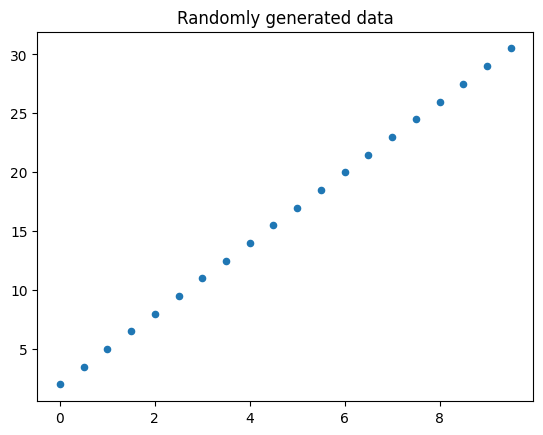

In [6]:
plt.scatter(X,y, s=20)
plt.title("Randomly generated data")
plt.show()

In [7]:
# do linear Regression from sklearn lib
X, y = X.reshape(-1,1),y.reshape(-1,1)
model = LinearRegression()
model.fit(X,y)
print("W_1:", model.coef_[0][0])
print("W_0:", model.intercept_[0])

W_1: 3.0000000000000004
W_0: 1.9999999999999982


In [11]:
#linear Regression using pytorch
torch.seed()

class SGDRegression(nn.Module):
  def __init__(self):
    super().__init__()
    self.fc1 = nn.Linear(1,1)
  def forward(self, x):
    y = self.fc1(x)
    return y

model = SGDRegression()
loss_fn = torch.nn.MSELoss()
optimizer = torch.optim.SGD(model.parameters(), lr = 0.01)
epochs = 5000
X_train = torch.tensor(X, dtype = torch.float32)
y_train = torch.tensor(y, dtype = torch.float32)

In [10]:
for name, param in model.named_parameters():
  print(name, param)

fc1.weight Parameter containing:
tensor([[-0.6517]], requires_grad=True)
fc1.bias Parameter containing:
tensor([-0.8737], requires_grad=True)


In [12]:
losses = []

for epoch in tqdm(range(epochs)):
  y_pred = model(X_train)
  loss = loss_fn(y_pred, y_train)
  losses.append(loss.item())
  optimizer.zero_grad()
  loss.backward()
  optimizer.step()
  if epoch%100 ==0:
    print(f"Loss : {loss.item()}")

  7%|▋         | 365/5000 [00:00<00:02, 1773.59it/s]

Loss : 168.46774291992188
Loss : 0.18270167708396912
Loss : 0.06364160776138306
Loss : 0.02216862142086029


 11%|█         | 541/5000 [00:00<00:03, 1242.55it/s]

Loss : 0.0077221267856657505
Loss : 0.0026898826472461224
Loss : 0.0009369848412461579


 19%|█▉        | 971/5000 [00:00<00:02, 1364.99it/s]

Loss : 0.00032636779360473156
Loss : 0.00011368464038241655
Loss : 3.960395042668097e-05


 26%|██▌       | 1275/5000 [00:00<00:02, 1448.30it/s]

Loss : 1.3795275663142093e-05
Loss : 4.80559401694336e-06
Loss : 1.6745905213610968e-06
Loss : 5.835689194100269e-07


 32%|███▏      | 1580/5000 [00:01<00:02, 1403.71it/s]

Loss : 2.034878434642451e-07
Loss : 7.088137721211751e-08
Loss : 2.4723982861019067e-08
Loss : 8.595213429885007e-09


 41%|████      | 2032/5000 [00:01<00:02, 1459.74it/s]

Loss : 3.0291098518375748e-09
Loss : 1.070088684329562e-09
Loss : 3.7613362424693264e-10
Loss : 1.5080629800490186e-10


 50%|████▉     | 2485/5000 [00:01<00:01, 1492.56it/s]

Loss : 4.440607950795261e-11
Loss : 4.440607950795261e-11
Loss : 4.440607950795261e-11
Loss : 4.440607950795261e-11


 56%|█████▌    | 2797/5000 [00:01<00:01, 1520.70it/s]

Loss : 4.440607950795261e-11
Loss : 4.440607950795261e-11
Loss : 4.440607950795261e-11


 62%|██████▏   | 3091/5000 [00:02<00:01, 1370.04it/s]

Loss : 4.440607950795261e-11
Loss : 4.440607950795261e-11
Loss : 4.440607950795261e-11


 68%|██████▊   | 3375/5000 [00:02<00:01, 1389.48it/s]

Loss : 4.440607950795261e-11
Loss : 4.440607950795261e-11
Loss : 4.440607950795261e-11


 73%|███████▎  | 3663/5000 [00:02<00:00, 1402.94it/s]

Loss : 4.440607950795261e-11
Loss : 4.440607950795261e-11
Loss : 4.440607950795261e-11


 79%|███████▉  | 3945/5000 [00:02<00:00, 1391.26it/s]

Loss : 4.440607950795261e-11
Loss : 4.440607950795261e-11
Loss : 4.440607950795261e-11


 87%|████████▋ | 4362/5000 [00:03<00:00, 1343.21it/s]

Loss : 4.440607950795261e-11
Loss : 4.440607950795261e-11
Loss : 4.440607950795261e-11


 95%|█████████▌| 4766/5000 [00:03<00:00, 1704.75it/s]

Loss : 4.440607950795261e-11
Loss : 4.440607950795261e-11
Loss : 4.440607950795261e-11
Loss : 4.440607950795261e-11
Loss : 4.440607950795261e-11


100%|██████████| 5000/5000 [00:03<00:00, 1460.83it/s]

Loss : 4.440607950795261e-11


In [13]:
for name, param in model.named_parameters():
  print(name, param)

fc1.weight Parameter containing:
tensor([[3.0000]], requires_grad=True)
fc1.bias Parameter containing:
tensor([2.0000], requires_grad=True)


In [14]:
#classification problem
# create a sample classification data using sklearn.make_blobs

centers = [[1,1], [-1,-1]]
X, y = make_blobs(n_samples = 750,
                  centers= centers,
                  cluster_std = 0.8,
                  random_state = 0)
X.shape, y.shape

((750, 2), (750,))

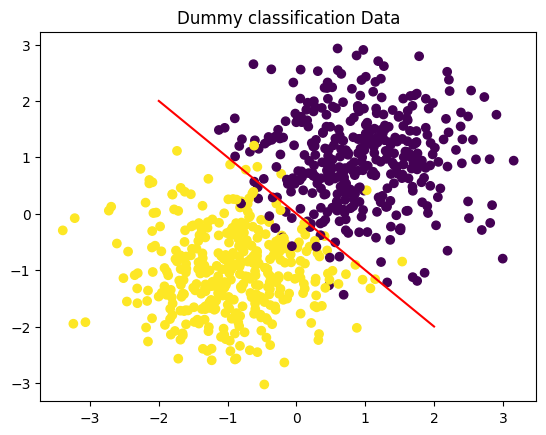

In [17]:
plt.scatter(X[:,0], X[:,1], c= y)
plt.title("Dummy classification Data")
plt.plot([-2,2],[2,-2],"r")
plt.show()

y = y.reshape(-1,1)

In [18]:
y.shape

(750, 1)

In [21]:
#pytorch model
torch.seed()

class LogisticRegression(nn.Module):
  def __init__(self):
    super().__init__()
    self.fc1 = nn.Linear(2,1)
  def forward(self, x):
    y = torch.sigmoid(self.fc1(x))
    return y

model = LogisticRegression()
loss_fn = torch.nn.BCELoss()
optimizer = torch.optim.SGD(model.parameters(), lr = 0.01)
epochs = 5000

X_train = torch.tensor(X, dtype = torch.float32)
y_train = torch.tensor(y, dtype = torch.float32)

In [22]:
losses = []
for epoch in range(epochs):
  y_pred = model(X_train)
  loss = loss_fn(y_pred, y_train)
  losses.append(loss.item())

  optimizer.zero_grad()
  loss.backward()
  optimizer.step()
  if epoch%100 ==0:
    print(f"epoch: {epoch} loss:{loss.item():.3f}")

epoch: 0 loss:0.760
epoch: 100 loss:0.442
epoch: 200 loss:0.326
epoch: 300 loss:0.269
epoch: 400 loss:0.235
epoch: 500 loss:0.212
epoch: 600 loss:0.196
epoch: 700 loss:0.184
epoch: 800 loss:0.174
epoch: 900 loss:0.166
epoch: 1000 loss:0.159
epoch: 1100 loss:0.154
epoch: 1200 loss:0.149
epoch: 1300 loss:0.145
epoch: 1400 loss:0.141
epoch: 1500 loss:0.138
epoch: 1600 loss:0.135
epoch: 1700 loss:0.133
epoch: 1800 loss:0.131
epoch: 1900 loss:0.128
epoch: 2000 loss:0.126
epoch: 2100 loss:0.125
epoch: 2200 loss:0.123
epoch: 2300 loss:0.122
epoch: 2400 loss:0.120
epoch: 2500 loss:0.119
epoch: 2600 loss:0.118
epoch: 2700 loss:0.117
epoch: 2800 loss:0.116
epoch: 2900 loss:0.115
epoch: 3000 loss:0.114
epoch: 3100 loss:0.113
epoch: 3200 loss:0.112
epoch: 3300 loss:0.111
epoch: 3400 loss:0.110
epoch: 3500 loss:0.110
epoch: 3600 loss:0.109
epoch: 3700 loss:0.108
epoch: 3800 loss:0.108
epoch: 3900 loss:0.107
epoch: 4000 loss:0.107
epoch: 4100 loss:0.106
epoch: 4200 loss:0.106
epoch: 4300 loss:0.105


In [23]:
accuracy = torch.sum((y_pred>0.5).int()== y_train)/len(y_train)
accuracy

tensor(0.9667)